In [5]:
import sys, os
sys.path.append(os.pardir)
import pickle
import numpy as np
from collections import OrderedDict
from common.layers import *
from common.gradient import numerical_gradient


class SimpleConvNet:
    
    def __init__(self, input_dim=(1, 28, 28), 
                 conv_param={'filter_num':30, 'filter_size':5, 'pad':0, 'stride':1},
                 hidden_size=100, output_size=10, weight_init_std=0.01):
        filter_num = conv_param['filter_num']
        filter_size = conv_param['filter_size']
        filter_pad = conv_param['pad']
        filter_stride = conv_param['stride']
        input_size = input_dim[1]
        conv_output_size = (input_size - filter_size + 2*filter_pad) / filter_stride + 1
        pool_output_size = int(filter_num * (conv_output_size/2) * (conv_output_size/2))

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(filter_num, input_dim[0], filter_size, filter_size)
        self.params['b1'] = np.zeros(filter_num)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(pool_output_size, hidden_size)
        self.params['b2'] = np.zeros(hidden_size)
        self.params['W3'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b3'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Conv1'] = Convolution(self.params['W1'], self.params['b1'],
                                           conv_param['stride'], conv_param['pad'])
        self.layers['Relu1'] = Relu()
        self.layers['Pool1'] = Pooling(pool_h=2, pool_w=2, stride=2)
        self.layers['Affine1'] = Affine(self.params['W2'], self.params['b2'])
        self.layers['Relu2'] = Relu()
        self.layers['Affine2'] = Affine(self.params['W3'], self.params['b3'])

        self.last_layer = SoftmaxWithLoss()

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, t):
         
         
        y = self.predict(x)
        return self.last_layer.forward(y, t)

    def accuracy(self, x, t, batch_size=100):
        if t.ndim != 1 : t = np.argmax(t, axis=1)
        
        acc = 0.0
        
        for i in range(int(x.shape[0] / batch_size)):
            tx = x[i*batch_size:(i+1)*batch_size]
            tt = t[i*batch_size:(i+1)*batch_size]
            y = self.predict(tx)
            y = np.argmax(y, axis=1)
            acc += np.sum(y == tt) 
        
        return acc / x.shape[0]

    def numerical_gradient(self, x, t):
         
        loss_w = lambda w: self.loss(x, t)

        grads = {}
        for idx in (1, 2, 3):
            grads['W' + str(idx)] = numerical_gradient(loss_w, self.params['W' + str(idx)])
            grads['b' + str(idx)] = numerical_gradient(loss_w, self.params['b' + str(idx)])

        return grads

    def gradient(self, x, t):
        
        # forward
        self.loss(x, t)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'], grads['b1'] = self.layers['Conv1'].dW, self.layers['Conv1'].db
        grads['W2'], grads['b2'] = self.layers['Affine1'].dW, self.layers['Affine1'].db
        grads['W3'], grads['b3'] = self.layers['Affine2'].dW, self.layers['Affine2'].db

        return grads
        
    def save_params(self, file_name="params.pkl"):
        params = {}
        for key, val in self.params.items():
            params[key] = val
        with open(file_name, 'wb') as f:
            pickle.dump(params, f)

    def load_params(self, file_name="params.pkl"):
        with open(file_name, 'rb') as f:
            params = pickle.load(f)
        for key, val in params.items():
            self.params[key] = val

        for i, key in enumerate(['Conv1', 'Affine1', 'Affine2']):
            self.layers[key].W = self.params['W' + str(i+1)]
            self.layers[key].b = self.params['b' + str(i+1)]
    

train loss:2.2993359634467354
=== epoch:1, train acc:0.202, test acc:0.194 ===
train loss:2.2950504059080816
train loss:2.2879452929391944
train loss:2.2834175573728275
train loss:2.2702740068591147
train loss:2.249655412002217
train loss:2.2209535626797794
train loss:2.2082028993977945
train loss:2.1742078551285626
train loss:2.1004660202016168
train loss:2.069632017459008
train loss:2.005400775405022
train loss:1.934300550120697
train loss:1.860894357302292
train loss:1.818035449852388
train loss:1.712880255971796
train loss:1.6453798729510782
train loss:1.4918764459411835
train loss:1.4477165601338595
train loss:1.3585683611098338
train loss:1.3712254869578784
train loss:1.3859787506354582
train loss:1.2792802627006212
train loss:1.1904202286961465
train loss:1.0400064403583453
train loss:1.1727172512255823
train loss:1.1692851964087014
train loss:0.9917471578733053
train loss:1.1670310265145425
train loss:1.2141866489255884
train loss:1.1875560268094594
train loss:0.931308174292541

train loss:0.5585525982005123
train loss:0.5846426486074757
train loss:0.43820486750375404
train loss:0.5069162903100313
train loss:0.5115737790426078
train loss:0.5430714391598594
train loss:0.5441318428395828
train loss:0.5853591942729107
train loss:0.4929968799407859
train loss:0.5621129190089769
train loss:0.5741323379411291
train loss:0.6586594213773523
train loss:0.7702723577595992
train loss:0.4599755989876638
train loss:0.667903324063819
train loss:0.5359254321392293
train loss:0.5831858085105622
train loss:0.49378422287560286
train loss:0.6929133279178472
train loss:0.627920242506236
train loss:0.6521005687441795
train loss:0.5904361482092836
train loss:0.48645832899718755
train loss:0.5139277348121473
train loss:0.5710296130922038
train loss:0.3824813948107446
train loss:0.5761442295201266
train loss:0.6370330517810487
train loss:0.5747399471126071
train loss:0.5924457835991409
train loss:0.4559863906720332
train loss:0.6570121035286701
train loss:0.45566828936064496
train lo

train loss:0.44969839451189925
train loss:0.4304951319740738
train loss:0.545154249686439
train loss:0.5027108433123705
train loss:0.5267267019728429
train loss:0.3884621356004392
train loss:0.4149200819012531
train loss:0.3896974968418421
train loss:0.43058684695506527
train loss:0.592056921942127
train loss:0.4188499407463151
train loss:0.47299435522647676
train loss:0.4166104214561121
train loss:0.40658868974910023
train loss:0.40617522282621715
train loss:0.4872895389807102
train loss:0.6293926242356231
train loss:0.3733683385343591
train loss:0.49529265930914923
train loss:0.5815514897060612
train loss:0.40866128683930825
train loss:0.5835147954593652
train loss:0.3933135621108885
train loss:0.4377386459529611
train loss:0.46206334921658054
train loss:0.45545866622937553
train loss:0.58533171498751
train loss:0.4648995059740069
train loss:0.5643448899847259
train loss:0.5159925156302694
train loss:0.5628094129907595
train loss:0.4342346214577232
train loss:0.5583204399164586
train

train loss:0.35204793757357544
train loss:0.528580948863545
train loss:0.4431698084813744
train loss:0.3091853584777351
train loss:0.2996505170179917
train loss:0.43099529436458417
train loss:0.36988663001361693
train loss:0.4370715476339972
train loss:0.40568204887863213
train loss:0.45259580164572805
train loss:0.3693961174167372
train loss:0.37406107771958186
train loss:0.4075691426291965
train loss:0.3188489296239809
train loss:0.40561976953904305
train loss:0.4636008316845859
train loss:0.4825891760884348
train loss:0.31332695421342704
train loss:0.3600780350425211
train loss:0.348064547082449
train loss:0.3139278606319805
train loss:0.45368398043825836
train loss:0.37983753394278486
train loss:0.4290192846056987
train loss:0.5602668745496739
train loss:0.3152853219304243
train loss:0.43915805312058276
train loss:0.44136321751882973
train loss:0.35118748449878323
train loss:0.3104693266144791
train loss:0.4023564305243593
train loss:0.36004804003945895
train loss:0.441145541728337

train loss:0.38674805627765707
train loss:0.3802393552923804
train loss:0.3131919881669591
train loss:0.3665934895743982
train loss:0.34025045488713096
train loss:0.2760221770599667
train loss:0.42873097263347726
train loss:0.24136998908820717
train loss:0.37127646215401255
train loss:0.36585164711595985
train loss:0.3282893906523323
train loss:0.497852356003069
train loss:0.3290868521120548
train loss:0.29656805531431035
train loss:0.35240172672485803
train loss:0.3905015704291038
train loss:0.30786231854409435
train loss:0.3735545926202124
train loss:0.41258086994867654
train loss:0.23589850804750032
train loss:0.4377514735180262
train loss:0.4321184455489051
train loss:0.31905183332595605
train loss:0.3680984493473457
train loss:0.35906183839180356
train loss:0.41669851156418247
train loss:0.3389275710759543
train loss:0.36399187665533417
train loss:0.3888166940375576
train loss:0.343260267326047
train loss:0.25808867886202985
train loss:0.29202791878211004
train loss:0.343350771689

train loss:0.3857759233839962
train loss:0.24820246230250423
train loss:0.43975394971279563
train loss:0.43097775594419624
train loss:0.1755656522863924
train loss:0.27907983407306824
train loss:0.26208145079907663
train loss:0.34172628262610666
train loss:0.26956629463718984
train loss:0.5820911692668287
train loss:0.3234654276411713
train loss:0.34289202817292475
train loss:0.3274240508472033
train loss:0.2696496617004193
train loss:0.35870987752807887
train loss:0.30920510759221953
train loss:0.45159480024941856
train loss:0.3716218477958181
train loss:0.3705090111578205
train loss:0.25431207771261005
train loss:0.38186914092571195
train loss:0.2955323727568422
train loss:0.27114115077779505
train loss:0.2280629517706555
train loss:0.39744373300002356
train loss:0.37387200849989577
train loss:0.4114386650171646
train loss:0.39953932667494485
train loss:0.21065720037771765
train loss:0.2568927604842105
train loss:0.39362496982237494
train loss:0.2921468459560867
train loss:0.33090696

train loss:0.49768665912144044
train loss:0.2689931018219006
train loss:0.2168777885400035
train loss:0.19266956891021994
train loss:0.23067382054300303
train loss:0.3598702457295237
train loss:0.28711066607499564
train loss:0.23931100976856573
train loss:0.23700306645852906
train loss:0.2532867934547711
train loss:0.39171986154524385
train loss:0.22636987797592684
train loss:0.42084777758872655
train loss:0.2693662475407827
train loss:0.3180703981488973
train loss:0.41152434147227096
train loss:0.23560997912634232
train loss:0.17113215044168512
train loss:0.3705300663812877
train loss:0.34263800013788415
train loss:0.25408186160961893
train loss:0.40183750709366406
train loss:0.17917257263939138
train loss:0.37560389984300036
train loss:0.38574634140478553
train loss:0.31644486316670734
train loss:0.27934074716629986
train loss:0.361075423285134
train loss:0.4107878695200574
train loss:0.22830491814823875
train loss:0.16976586255379705
train loss:0.36792325947143845
train loss:0.20744

train loss:0.2918199127165719
train loss:0.35581538039003396
train loss:0.31739470209140974
train loss:0.28818797794447865
train loss:0.3445000350614088
train loss:0.29896756012816333
train loss:0.25548029033663366
train loss:0.33051179114780543
train loss:0.316140994954458
train loss:0.29854143576395864
train loss:0.293650034737651
train loss:0.260030152433629
train loss:0.21554071090947546
train loss:0.3540366506084122
train loss:0.20839805858343496
train loss:0.3611779253527424
train loss:0.27586434120151637
train loss:0.2504354181332929
train loss:0.24288020296776414
train loss:0.30020605024990465
train loss:0.38603444840768586
train loss:0.38679184236540737
train loss:0.3417995023483032
train loss:0.2822547762515619
train loss:0.2979685577259958
train loss:0.23989166993393532
train loss:0.4803671464809892
train loss:0.2763486267688763
train loss:0.24046852076849706
train loss:0.4246964959939345
train loss:0.322814175096952
train loss:0.22716842529066242
train loss:0.29085496176253

train loss:0.23448417980467487
train loss:0.38384022527201195
train loss:0.24828589846610735
train loss:0.30476905921976766
train loss:0.2615042003419854
train loss:0.37107205372573027
train loss:0.25794486988417886
train loss:0.22521130972076983
train loss:0.34571078026272345
train loss:0.21203578025409964
train loss:0.28665426068248673
train loss:0.2835664196749564
train loss:0.2593556354261284
train loss:0.3055201844826403
train loss:0.25318197558053074
train loss:0.35237633052236367
train loss:0.2981292600659861
train loss:0.3254597691312091
train loss:0.3956622708766335
train loss:0.33198277756156697
train loss:0.34946010249110304
train loss:0.24034671823121515
train loss:0.21549073736935917
train loss:0.2289990130247388
train loss:0.3160916366475484
train loss:0.3113861224948771
train loss:0.24464352248591317
train loss:0.2734490495396244
train loss:0.2513972776440095
train loss:0.3019209816902766
train loss:0.2910575705087861
train loss:0.3373861292706547
train loss:0.3317157140

train loss:0.24351226481134322
train loss:0.2113175677086013
train loss:0.27100629813123794
train loss:0.4568039342703764
train loss:0.15509123287256849
train loss:0.2064569611157299
train loss:0.22668431647668427
train loss:0.2957777799668232
train loss:0.2622883547999066
train loss:0.21635738498603443
train loss:0.20768208388481293
train loss:0.2436264245769657
train loss:0.23630253285090463
train loss:0.2465138161240791
train loss:0.176665031803785
train loss:0.2163088109287618
train loss:0.3591484165122264
train loss:0.27511553450635723
train loss:0.37008771827015907
train loss:0.35029812637982716
train loss:0.2886983009897873
train loss:0.11679185894737755
train loss:0.24191201902440126
train loss:0.3205316434454626
train loss:0.2385983996428186
train loss:0.29753389153112003
train loss:0.3195092273777436
train loss:0.1691213408596284
train loss:0.2890360451618517
train loss:0.3080846447004266
train loss:0.22738782494845805
train loss:0.3184988679500806
train loss:0.27510630141691

train loss:0.2521531526698368
train loss:0.15142173693778022
train loss:0.3018058807396121
train loss:0.22914305809438307
train loss:0.26377914287333065
train loss:0.24573215093529033
train loss:0.1712500483774022
train loss:0.28272710182223315
train loss:0.25611313169744365
train loss:0.25916530984680086
train loss:0.3173056437744471
train loss:0.23875454631333426
train loss:0.17269537067306867
train loss:0.30686037462159904
train loss:0.29765696911031503
train loss:0.2318856127221505
train loss:0.20770913771607277
train loss:0.1797961383980487
train loss:0.23852077475904374
train loss:0.26786432914701197
train loss:0.1459022628877779
train loss:0.16826786257856605
train loss:0.3819835231909597
train loss:0.2749413518137854
train loss:0.3857071995186515
train loss:0.16169215368318632
train loss:0.18636604246442448
train loss:0.3175156270926085
train loss:0.2253738231443888
train loss:0.23166576850741583
train loss:0.22348219757793486
train loss:0.20177652596328494
train loss:0.2191462

train loss:0.2876857849331526
train loss:0.2211401285972012
train loss:0.24352373887922604
train loss:0.22600490036505433
train loss:0.2525014381322121
train loss:0.299886963241573
train loss:0.2150763412110498
train loss:0.2908923970745176
train loss:0.1620709926769036
train loss:0.25803383350850057
train loss:0.2582491509504279
train loss:0.19057470760447118
train loss:0.15306678458779302
train loss:0.2242189883291512
train loss:0.2839346946813631
train loss:0.29286510968083485
train loss:0.27698178775982674
train loss:0.35310497725605083
train loss:0.18101137291984437
train loss:0.2871863368938666
train loss:0.2399979928041783
train loss:0.34656689706986116
train loss:0.25431960088868366
train loss:0.21287349129619915
train loss:0.17532252498395806
train loss:0.18781211708049994
train loss:0.3016044702943018
train loss:0.22754396012113673
train loss:0.15731163115914512
train loss:0.20199628643096088
train loss:0.30991028271989607
train loss:0.2810772290949442
train loss:0.2221757767

train loss:0.19439384145666733
train loss:0.32324813916774736
train loss:0.17856940667278226
train loss:0.22474085317885126
train loss:0.2288425029686891
train loss:0.2402623769812838
train loss:0.197710430640449
train loss:0.35450777104708264
train loss:0.18241360197507045
train loss:0.2400586687558209
train loss:0.15671560053031744
train loss:0.22668926816455814
train loss:0.29835334074164005
train loss:0.2890750170281433
train loss:0.11637356026458928
train loss:0.2478453642231885
train loss:0.3282373827890772
train loss:0.2449578631930434
train loss:0.19653436207695585
train loss:0.25654976486910225
train loss:0.15249124085130383
train loss:0.3138285780905923
train loss:0.24095874777813575
train loss:0.215331152385973
train loss:0.27398364599063785
train loss:0.29892274414794584
train loss:0.2278241679861884
train loss:0.23192272823131344
train loss:0.19981306635065177
train loss:0.21002966366051584
train loss:0.12073217601602669
train loss:0.19668687756419992
train loss:0.30323469

train loss:0.2607296464304096
train loss:0.2440959038142682
train loss:0.36976200778221746
train loss:0.2182874640258565
train loss:0.18032697961747715
train loss:0.21016895909689295
train loss:0.21698036088398687
train loss:0.1372184733748181
train loss:0.15218278963236426
train loss:0.2921393438841859
train loss:0.2321119369746707
train loss:0.21347068085132903
train loss:0.2517415719989103
train loss:0.15746682755665217
train loss:0.20999003187476353
train loss:0.2767577074628961
train loss:0.17134743535657307
train loss:0.19400032913155937
train loss:0.20061183690442
train loss:0.3109562496932983
train loss:0.21684366610946604
train loss:0.2629723708375684
train loss:0.3160631850974176
train loss:0.1648340181220419
train loss:0.27678610780018287
train loss:0.20726304760742895
train loss:0.28810670226802537
train loss:0.18658275053426931
train loss:0.1790190734922123
train loss:0.21636895790286195
train loss:0.22319291090222693
train loss:0.15328090746710626
train loss:0.25449653228

train loss:0.23053267214306422
train loss:0.2707523307347929
train loss:0.28540789711285275
train loss:0.1519048549544108
train loss:0.2737705337362676
train loss:0.24395151210653976
train loss:0.15656210460597936
train loss:0.21454089498144474
train loss:0.17470537089581076
train loss:0.2691966332330759
train loss:0.14791139032329095
train loss:0.0982948591838776
train loss:0.23239850645618915
train loss:0.1284303045704906
train loss:0.23619588424368235
train loss:0.22001750082026533
train loss:0.15778601603049883
train loss:0.21846679708103603
train loss:0.34443279003834576
train loss:0.1765562805675718
train loss:0.18918931328259872
train loss:0.2088636177243438
train loss:0.20698580275405487
train loss:0.24322042183960194
train loss:0.27572343062175547
train loss:0.34881897697944697
train loss:0.28424503772294163
train loss:0.19666226775565993
train loss:0.2116246573583413
train loss:0.16283805929174683
train loss:0.23219981945736926
train loss:0.2516381397563898
train loss:0.12259

train loss:0.2358043540920296
train loss:0.13597842211102085
train loss:0.17187655084944048
train loss:0.20528561110328408
train loss:0.1571767843767018
train loss:0.16389850847517326
train loss:0.24789126943353168
train loss:0.16201108457346866
train loss:0.19667796670002755
train loss:0.12114365402830385
train loss:0.1764152007076375
train loss:0.2000606466689199
train loss:0.3263975003903765
train loss:0.17505032127075507
train loss:0.23477601356878758
train loss:0.18532319716592885
train loss:0.18132959946127086
train loss:0.13619088385403702
train loss:0.1957910902060238
train loss:0.08775675980714814
train loss:0.2560226106204395
train loss:0.24658679388349114
train loss:0.19386295702966794
train loss:0.19509595537614208
train loss:0.16503459510279073
train loss:0.18881266047198225
train loss:0.2146278465242903
train loss:0.19197948878817023
train loss:0.12793858500509117
train loss:0.165693554985966
train loss:0.17763056606800143
train loss:0.14614619897114056
train loss:0.21118

train loss:0.12474646611927996
train loss:0.19289421731579154
train loss:0.29497415091169166
train loss:0.12861985098788725
train loss:0.21164183444406975
train loss:0.2148634121667036
train loss:0.19623629443082766
train loss:0.13733033788248825
train loss:0.1581499589565429
train loss:0.1336649376675946
train loss:0.2561538031736713
train loss:0.27586084014563567
train loss:0.29348747207133674
train loss:0.2273520069104433
train loss:0.1384938727759359
train loss:0.2813770446687755
train loss:0.26516952280698725
train loss:0.27431519876498567
train loss:0.2656963461204327
train loss:0.1403528045198729
train loss:0.2122469715727574
train loss:0.12213803922189177
train loss:0.16079533482632996
train loss:0.2280474890532465
train loss:0.1754599772706092
train loss:0.12069287531263864
train loss:0.3009138828627959
train loss:0.08460954776404113
train loss:0.25258460863763266
train loss:0.1622090227929579
train loss:0.15583372961373024
train loss:0.2577843014137578
train loss:0.0866543176

train loss:0.20527821825727854
train loss:0.2142731349528197
train loss:0.19307939459762186
train loss:0.1448275650248627
train loss:0.17210786628290228
train loss:0.22947535600389926
train loss:0.18234846974879168
train loss:0.2628528472865608
train loss:0.20789108037454845
train loss:0.15290380414550978
train loss:0.15060991423215578
train loss:0.2167033987116091
train loss:0.18056976438398784
train loss:0.24122899779776663
train loss:0.17478161508989964
train loss:0.3243794576211287
train loss:0.2758378189122452
train loss:0.19530602356931223
train loss:0.1498074310131218
train loss:0.24105563837029048
train loss:0.1139155595727831
train loss:0.18827210321797025
train loss:0.1968182246115819
train loss:0.15573150804913416
train loss:0.21286888252909356
train loss:0.12677831124131594
train loss:0.18107492486918225
train loss:0.3229270010396668
train loss:0.14399331616416214
train loss:0.18443744719415794
train loss:0.20613284697883028
train loss:0.2315300529776001
train loss:0.150832

train loss:0.15109824449471793
train loss:0.1942605792638676
train loss:0.19058807081234413
train loss:0.20178212730396786
train loss:0.18851809467245878
train loss:0.16323544913998428
train loss:0.16423659192267967
train loss:0.2062536109991768
train loss:0.15725234360579918
train loss:0.15607855431094883
train loss:0.24061495341424893
train loss:0.09952670898080088
train loss:0.12601751800822417
train loss:0.19168880386719853
train loss:0.21220796280180443
train loss:0.2022734139820766
train loss:0.1861868121894421
train loss:0.17718546853146694
train loss:0.21854751340014694
train loss:0.18547295770442015
train loss:0.19113755442368632
train loss:0.16260069626873286
train loss:0.19530582576616431
train loss:0.2728852637943114
train loss:0.1545748766173941
train loss:0.13854095859665005
train loss:0.166181691203864
train loss:0.1267260475305064
train loss:0.249700574704452
train loss:0.08312707540116276
train loss:0.2737945931526573
train loss:0.1575639251678204
train loss:0.38632937

train loss:0.1715549860654249
train loss:0.1918285644107958
train loss:0.10563966431782498
train loss:0.2539848161800926
train loss:0.12905541873086357
train loss:0.15829082483008253
train loss:0.23307651869421533
train loss:0.20531397418552033
train loss:0.16008858097149056
train loss:0.17938830717808185
train loss:0.14174952865334361
train loss:0.23204589911590134
train loss:0.2147744297113419
train loss:0.21224380396531561
train loss:0.14484361057385856
train loss:0.12186719191438129
train loss:0.16280749915471504
train loss:0.21601256285153977
train loss:0.210181677341764
train loss:0.1277439102877152
train loss:0.17430813202753417
train loss:0.11538031972940756
train loss:0.10606215609008218
train loss:0.28788878572526827
train loss:0.20391916480579944
train loss:0.17782689369397361
train loss:0.21977920613005572
train loss:0.1516777883321037
train loss:0.15295179404133097
train loss:0.13102821839160186
train loss:0.18130377859657426
train loss:0.20780505379173195
train loss:0.162

train loss:0.22223267963060767
train loss:0.25028096667372035
train loss:0.14691633496604317
train loss:0.1611474708636659
train loss:0.17349425786096556
train loss:0.143967715492271
train loss:0.21597810466954454
train loss:0.18900306965168245
train loss:0.11802839849976342
train loss:0.24151616389566674
train loss:0.20031467876039188
train loss:0.19322853725180514
train loss:0.10824740951297818
train loss:0.16299069383514633
train loss:0.11703372615191929
train loss:0.17295370883524597
train loss:0.2453765428208452
train loss:0.3060773026902538
train loss:0.1990723639491641
train loss:0.13070572176825482
train loss:0.13989604653160256
train loss:0.15108441564227684
train loss:0.1358557589366292
train loss:0.16465461765813788
train loss:0.14809828048074544
train loss:0.16962430937155074
train loss:0.16595220140744832
train loss:0.20324486348640355
train loss:0.18250491239501943
train loss:0.1659838455339816
train loss:0.1487259933055339
train loss:0.2180114094657407
=== epoch:10, trai

train loss:0.11267119266503207
train loss:0.26175339311676776
train loss:0.10746255658575482
train loss:0.0890231046569423
train loss:0.2020186007375759
train loss:0.20127508717383158
train loss:0.1444929446743989
train loss:0.16564347230890342
train loss:0.1549278427726598
train loss:0.15211088889339744
train loss:0.21250702766922225
train loss:0.1601116966847435
train loss:0.1306487720568142
train loss:0.15617511668098458
train loss:0.1805133613440715
train loss:0.13650495123829912
train loss:0.11202232573486504
train loss:0.2434289945931214
train loss:0.09895997103018567
train loss:0.0963350960759371
train loss:0.07427899906302894
train loss:0.1058101742344965
train loss:0.25387114305828645
train loss:0.21104203651855807
train loss:0.1458030110899408
train loss:0.1326535147717447
train loss:0.21429228469600065
train loss:0.09519564962326632
train loss:0.14088318732098606
train loss:0.19403835105789444
train loss:0.12770739504564996
train loss:0.2018926916230484
train loss:0.15930020

train loss:0.11731769782295365
train loss:0.11798017342806004
train loss:0.157713606112038
train loss:0.31073161578591024
train loss:0.15961594348463537
train loss:0.16414933680553634
train loss:0.08845061365694906
train loss:0.10057216957116491
train loss:0.16383467044989067
train loss:0.16619981610247853
train loss:0.10828505341997513
train loss:0.21800016738114814
train loss:0.15449285353354145
train loss:0.13506433040230773
train loss:0.11830468606849415
train loss:0.18896580489153225
train loss:0.10836685391816754
train loss:0.23099830016686895
train loss:0.18242697209830044
train loss:0.13240926941735673
train loss:0.2980431172925693
train loss:0.15805145728370895
train loss:0.23930430860984908
train loss:0.12171887151920924
train loss:0.15790355921625182
train loss:0.1459960492180732
train loss:0.05651298583681905
train loss:0.13012613605619142
train loss:0.15135448365493176
train loss:0.2557574220768869
train loss:0.18974276407302743
train loss:0.05067922046552196
train loss:0.

train loss:0.17519735688972754
train loss:0.1672611465823409
train loss:0.1383485616381807
train loss:0.12931623839742656
train loss:0.11023816054783005
train loss:0.2477000414182319
train loss:0.16079125602041558
train loss:0.13781142094073925
train loss:0.13375977537617628
train loss:0.10492951861427383
train loss:0.14979118131957309
train loss:0.07121732686737606
train loss:0.17640871180924886
train loss:0.1306023332138152
train loss:0.11773303813236097
train loss:0.13042573961453596
train loss:0.12167850513523837
train loss:0.11747619052740348
train loss:0.1992324003689709
train loss:0.15587961325845842
train loss:0.11883106995476428
train loss:0.13090286751101654
train loss:0.10479802387923483
train loss:0.14084755188322687
train loss:0.1406921617363123
train loss:0.1032135322339084
train loss:0.16908802648455484
train loss:0.1365701091269772
train loss:0.20567254756997233
train loss:0.1646989586847247
train loss:0.11046651242962525
train loss:0.13386528260695252
train loss:0.0942

train loss:0.15720889255041598
train loss:0.14369610041677014
train loss:0.12265065428229065
train loss:0.13106345516902804
train loss:0.1210777239464196
train loss:0.14443918455622165
train loss:0.22870403808399825
train loss:0.14492150409103816
train loss:0.18202186987982588
train loss:0.20830475363062306
train loss:0.15311354983826145
train loss:0.19704586749231204
train loss:0.26738335696169435
train loss:0.12777342702439073
train loss:0.09729862794286699
train loss:0.14373881852073625
train loss:0.14076173349726706
train loss:0.11085293818530552
train loss:0.2547094757083819
train loss:0.22190455154254196
train loss:0.11149428965187116
train loss:0.12267793173537946
train loss:0.26254229226984893
train loss:0.14213436650447933
train loss:0.11785543687694902
train loss:0.2294220615634785
train loss:0.09901011528062192
train loss:0.17396072768784662
train loss:0.05953574331650167
train loss:0.16571204859540653
train loss:0.13549458941918793
train loss:0.1575568649425273
train loss:0

train loss:0.2794564939811875
train loss:0.18394897936764873
train loss:0.09042632077637373
train loss:0.1631845387090357
train loss:0.08242375792518375
train loss:0.12285890687559325
train loss:0.11475341761687902
train loss:0.08555473349723153
train loss:0.13286319989536197
train loss:0.1027570986172948
train loss:0.09259464262675174
train loss:0.1235096313745726
train loss:0.14854303028464308
train loss:0.12879561479007814
train loss:0.12195857567563902
train loss:0.13718260082716371
train loss:0.15190694002409802
train loss:0.14618030392606313
train loss:0.13784142835947863
train loss:0.161658321312861
train loss:0.07896918917218958
train loss:0.10233105173475479
train loss:0.1010395734979112
train loss:0.0659482318502153
train loss:0.27630083006128603
train loss:0.12560776572083615
train loss:0.11350771408539517
train loss:0.09273360637472589
train loss:0.1259857943571009
train loss:0.1329282505409901
train loss:0.15241131727294058
train loss:0.2130046927652261
train loss:0.059630

train loss:0.07529609720232734
train loss:0.0857743026651391
train loss:0.24213925000686706
train loss:0.17291016366429784
train loss:0.13351574338817115
train loss:0.1564379602765259
train loss:0.17662805963507627
train loss:0.14877780068040306
train loss:0.10524035080597789
train loss:0.09147892511509301
train loss:0.09839458961560427
train loss:0.13051514989044202
train loss:0.1360575188391637
train loss:0.07285894324339737
train loss:0.18741257216667062
train loss:0.16958714818300083
train loss:0.14232400003754406
train loss:0.2109535764642514
train loss:0.12422583078477409
train loss:0.11247668768262177
train loss:0.12045178267069545
train loss:0.14799439422087432
train loss:0.13239845524407612
train loss:0.156752036724562
train loss:0.06335139642395438
train loss:0.09424192407866862
train loss:0.1612063397551228
train loss:0.09679953546892257
train loss:0.12292615585559127
train loss:0.0762159711443584
train loss:0.10646124847723874
train loss:0.1494329558026164
train loss:0.1464

train loss:0.11531071782887985
train loss:0.11802443818773016
train loss:0.12542474291151556
train loss:0.1071531328823006
train loss:0.06520025959283825
train loss:0.11418674612294012
train loss:0.10403668575193273
train loss:0.10619992930531084
train loss:0.1535983746168233
train loss:0.1425814572483187
train loss:0.14984170801896074
train loss:0.14652208242998246
train loss:0.061067864136787
train loss:0.12319183933480815
train loss:0.09542784324452684
train loss:0.16705215537206994
train loss:0.1158697488978599
train loss:0.12959978669412775
train loss:0.11542798786734859
train loss:0.12407263533936379
train loss:0.07870646930794259
train loss:0.17079637231810887
train loss:0.06021662690357941
train loss:0.10100887910598591
train loss:0.15677472769926878
train loss:0.0845139755545394
train loss:0.12181208839425342
train loss:0.11631535594994251
train loss:0.13087901110066247
train loss:0.10199148927691658
train loss:0.1004312235624667
train loss:0.10984354853356311
train loss:0.181

train loss:0.08269402019806218
train loss:0.12330704551967349
train loss:0.09901117652928214
train loss:0.1195390648501891
train loss:0.12034494705621675
train loss:0.0598675186543756
train loss:0.10002407389972102
train loss:0.16836942392704532
train loss:0.16737980664069813
train loss:0.11791986339614026
train loss:0.09858397761968343
train loss:0.13336999134431082
train loss:0.134238985691442
train loss:0.11614670778753171
train loss:0.12770909261979557
train loss:0.10367297798260801
train loss:0.13586691886591926
train loss:0.20735949913929339
train loss:0.10389789710045287
train loss:0.1353300051317066
train loss:0.1998750004389483
train loss:0.06351510406518654
train loss:0.16705349017055837
train loss:0.12336991563211376
train loss:0.08812684749891955
train loss:0.0981109996781987
train loss:0.10360588905894927
train loss:0.140552881807409
train loss:0.15299443627151238
train loss:0.09828859281595395
train loss:0.19016968635666529
train loss:0.14626897076745246
train loss:0.1117

train loss:0.08180473054525624
train loss:0.12091580477681947
train loss:0.06179942593528153
train loss:0.07372454346103
train loss:0.07391347998987777
train loss:0.07831354867926968
train loss:0.1778873870914589
train loss:0.12556353705058154
train loss:0.12953531079758465
train loss:0.07174763771549736
train loss:0.1843478523960395
train loss:0.06280628272113228
train loss:0.14528766887770414
train loss:0.1622433062691712
train loss:0.15684731106510416
train loss:0.11997966572884586
train loss:0.13080752991479735
train loss:0.1266125279330934
train loss:0.05643965707752658
train loss:0.14302089129617504
train loss:0.1105411032384866
train loss:0.09981059954223952
train loss:0.13519622821514438
train loss:0.1353089689300333
train loss:0.11692051776828484
train loss:0.1142661284352474
train loss:0.17132736975761098
train loss:0.11245404390738517
train loss:0.06499772687193138
train loss:0.19897364240549698
train loss:0.07415030224258502
train loss:0.10130681949171545
train loss:0.10670

train loss:0.14435819341640505
train loss:0.057004201364031726
train loss:0.10288192461368162
train loss:0.14923601512466317
train loss:0.15041454693523534
train loss:0.07148952875710321
train loss:0.12074335500605965
train loss:0.09595036834954188
train loss:0.06437488597514525
train loss:0.13312294888626786
train loss:0.139138391514577
train loss:0.19473820912048873
train loss:0.15953144117326543
train loss:0.10481550633208889
train loss:0.05937366654460417
train loss:0.13069472457141676
train loss:0.113095500030996
train loss:0.09074070510488463
train loss:0.15681976229233285
train loss:0.18038650508046924
train loss:0.07932417109346393
train loss:0.25313960515630646
train loss:0.11689526162766128
train loss:0.051352538015096434
train loss:0.14227802355677505
train loss:0.06525856350709007
train loss:0.14353405018999946
train loss:0.12326387601240424
train loss:0.07304613481609644
train loss:0.07463145063747438
train loss:0.1299638577216673
train loss:0.09655041569679304
train loss:

train loss:0.050274882077345345
train loss:0.11250376878107314
train loss:0.08989603050072115
train loss:0.13242128118277896
train loss:0.09216282304452546
train loss:0.10537656842277722
train loss:0.22114175903476332
train loss:0.16642170817247753
train loss:0.04667183033516457
train loss:0.0844657953407536
train loss:0.13278831783567088
train loss:0.1697064249503447
train loss:0.10845537478876459
train loss:0.1206582727270217
train loss:0.04467284948333666
train loss:0.07916551708329242
train loss:0.18242275356719392
train loss:0.17227860039338339
train loss:0.05764454829633645
train loss:0.1083866774741434
train loss:0.05813343187058777
train loss:0.04965970228537753
train loss:0.06268185347495653
train loss:0.09193831814875975
train loss:0.10154909289053526
train loss:0.3095570954669629
train loss:0.12124062161922344
train loss:0.08906704284682514
train loss:0.0772029752386175
train loss:0.10715774224763228
train loss:0.10217694495451772
train loss:0.21878035465375864
train loss:0.

train loss:0.12020599718536973
train loss:0.08496787824535548
train loss:0.09442782793293324
train loss:0.11355284880994372
train loss:0.11496713943426143
train loss:0.11524395162464174
train loss:0.07670236110841111
train loss:0.046412593026183224
train loss:0.08571881760985935
train loss:0.16246634090326734
train loss:0.068315727874661
train loss:0.11366715098406738
train loss:0.07005584382663486
train loss:0.07384112148151065
train loss:0.11751885599500729
train loss:0.1045273031662779
train loss:0.17265613895630197
train loss:0.0953305763470994
train loss:0.14065608422069673
train loss:0.16920485976869645
train loss:0.07338440966690389
train loss:0.08263130602832114
train loss:0.17438301925851107
train loss:0.046452179352048845
train loss:0.13795586272177826
train loss:0.09070773898419952
train loss:0.14834312024978874
train loss:0.10868517547993971
train loss:0.07626022171619504
train loss:0.07134689170400339
train loss:0.1653467093047525
train loss:0.1616688481378598
train loss:0

train loss:0.06647696546206577
train loss:0.16802689928450398
train loss:0.1406062820418078
train loss:0.04986124607671884
train loss:0.07425777064854881
train loss:0.05594138916737409
train loss:0.15748450751053508
train loss:0.12928560878542805
train loss:0.11402738190180649
train loss:0.17647627686290587
train loss:0.11977826436175378
train loss:0.11708595220298422
train loss:0.0698755433198071
train loss:0.11254659198610632
train loss:0.07762624627785696
train loss:0.0827152989335581
train loss:0.14644643563325171
train loss:0.2115460064415759
train loss:0.11000186715053684
train loss:0.07459385834972813
train loss:0.05095071085876941
train loss:0.07385840357889945
train loss:0.16600983465852648
train loss:0.10906013181191954
train loss:0.06513740210280634
train loss:0.08992439073685278
train loss:0.04143953604104677
train loss:0.10378726262091745
train loss:0.052918996968016635
train loss:0.12498982121665471
train loss:0.19844092343797962
train loss:0.07551568133989782
train loss:

train loss:0.09379061246086684
train loss:0.07788193670649016
train loss:0.07086386448881124
train loss:0.09373436668441809
train loss:0.11391498327766497
train loss:0.0653831081081026
train loss:0.14955523906752974
train loss:0.08926764721881339
train loss:0.07358669710475021
train loss:0.09009408433877236
train loss:0.14106703839629936
train loss:0.10947174642080863
train loss:0.055586832068274805
train loss:0.10124008738399373
train loss:0.08352689084356384
train loss:0.0949012797212038
train loss:0.23370132942161675
train loss:0.12736351486538536
train loss:0.09494087366411832
train loss:0.11615595116035544
train loss:0.10639733167892666
train loss:0.0855009956093118
train loss:0.12736771467345542
train loss:0.07928316724234724
train loss:0.15106141465312928
train loss:0.06371285117530995
train loss:0.12416554738328722
train loss:0.09145903481410515
train loss:0.10148727623104639
train loss:0.12350884857696479
train loss:0.11474937756857964
train loss:0.09545800814766915
train loss

train loss:0.09205162850745102
train loss:0.10585297305162479
train loss:0.08944690458032004
train loss:0.08457247152361884
train loss:0.06613462938925592
train loss:0.08410883795776206
train loss:0.034460113019810466
train loss:0.07778400289011837
train loss:0.08665781641880449
train loss:0.17032406296326877
train loss:0.06794262509684217
train loss:0.03204959517643513
train loss:0.04790328597817041
train loss:0.12666883813777108
train loss:0.07171842521998822
train loss:0.07430382661617935
train loss:0.13425268652694325
train loss:0.07045534901498433
train loss:0.07583789914141109
train loss:0.09707163351861389
train loss:0.12380527431840953
train loss:0.02830393612272375
train loss:0.06103482592523424
train loss:0.06167152337292743
train loss:0.034811805094383814
train loss:0.1082910194235524
train loss:0.054348549236566665
train loss:0.09682177071770132
train loss:0.12612293239411593
train loss:0.06473081395024251
train loss:0.10512791456273289
train loss:0.06711514731228677
train 

train loss:0.0714121728190127
train loss:0.14960720548896886
train loss:0.0879129736987232
train loss:0.10888022065295155
train loss:0.08263084411579116
train loss:0.12479043777778548
train loss:0.04502453354790156
train loss:0.11086621638053985
train loss:0.11076787108463808
train loss:0.05273221645950268
train loss:0.06200096073156581
train loss:0.14616023358329586
train loss:0.12382093571441316
train loss:0.1080672114114452
train loss:0.14187477250984631
train loss:0.10558451932208124
train loss:0.029192219549623376
train loss:0.05637194743635704
train loss:0.07843201807469842
train loss:0.08868533732928251
train loss:0.07057843638162796
train loss:0.06662854009073249
train loss:0.09700340317233618
train loss:0.0905432131557947
train loss:0.050296676209199476
train loss:0.06329710177087412
train loss:0.05637163541744369
train loss:0.11187530941895166
train loss:0.0393663151304529
train loss:0.07865208574237033
train loss:0.10473378915777114
train loss:0.0864843491758969
train loss:0

train loss:0.06813400913481231
train loss:0.08909957152256333
train loss:0.11604947161392762
train loss:0.06214977819966176
train loss:0.08095089890571266
train loss:0.03841982383473768
train loss:0.10061122027171457
train loss:0.06817069811559565
train loss:0.12222725735073377
train loss:0.18421860545090812
train loss:0.12239556153837365
train loss:0.040354813602290734
train loss:0.13601133165138282
train loss:0.08537160823320165
train loss:0.07220336552683258
train loss:0.10753301645049954
train loss:0.07130471326575705
train loss:0.12688090109557804
train loss:0.09590550109375001
train loss:0.09013722845843503
train loss:0.08111225952026238
train loss:0.09838449614970393
train loss:0.08170363974403495
train loss:0.0765059705033074
train loss:0.03288790348679166
train loss:0.1224664913182303
train loss:0.05239036873780969
train loss:0.060352071270545295
train loss:0.07307632469155162
train loss:0.07982203432741891
train loss:0.07743770395446749
train loss:0.08086188679382329
train lo

train loss:0.02884657982866297
train loss:0.09729881710767574
train loss:0.1135250338844755
train loss:0.05775067511639222
train loss:0.07768458930137091
train loss:0.07468300069544802
train loss:0.05081973347791203
train loss:0.09931809543842039
train loss:0.03476619911696723
train loss:0.09414817532111529
train loss:0.09147530508143367
train loss:0.07747090524346265
train loss:0.045924234730877506
train loss:0.07819784567094323
train loss:0.05199785605417949
train loss:0.09129024210521548
train loss:0.06092964752383603
train loss:0.14915055741748412
train loss:0.09345877244956753
train loss:0.08750342545343534
train loss:0.048999143839233025
train loss:0.06702514166429259
train loss:0.09875096327158986
train loss:0.05856091960208701
train loss:0.04040975492342524
train loss:0.062038937560114346
train loss:0.047668947918228934
train loss:0.09380647026172947
train loss:0.08959558961646037
train loss:0.07498819161097839
train loss:0.1360076338868258
train loss:0.08984306184257056
train 

train loss:0.08095966545510859
train loss:0.08959593554234668
train loss:0.13381545317803575
train loss:0.05256804026737392
train loss:0.06836883132817535
train loss:0.12846164987120326
train loss:0.13281367040327338
train loss:0.10022387331692865
train loss:0.17668241848829425
train loss:0.08629260214516975
train loss:0.08448369687290526
train loss:0.10392918730773207
train loss:0.05435386042721068
train loss:0.09458708231866408
train loss:0.08044385836648515
train loss:0.10485784146768463
train loss:0.027442580386927748
train loss:0.03605571226687773
train loss:0.06188953792282895
train loss:0.03326858588861528
train loss:0.08499712938736968
train loss:0.07388015434243773
train loss:0.041502588275453355
train loss:0.05102158273818151
train loss:0.07529741127296209
train loss:0.07793809754583805
train loss:0.05059522038735301
train loss:0.07583639972292232
train loss:0.08296160204417417
train loss:0.02404046638038283
train loss:0.09503207433966246
train loss:0.1352393959410788
train l

train loss:0.05624064414206427
train loss:0.056272619657365484
train loss:0.05523145970543907
train loss:0.0654863116543636
train loss:0.09161283661970727
train loss:0.06274402285018241
train loss:0.05064585538935039
train loss:0.1205692025708054
train loss:0.11850673820222653
train loss:0.06815284432071256
train loss:0.09669464922142806
train loss:0.11724885682177376
train loss:0.06852894378730885
train loss:0.08268657333921996
train loss:0.11756324562195218
train loss:0.12492086437013655
train loss:0.08774861171744512
train loss:0.060373585135869316
train loss:0.0460292037331001
train loss:0.05075477023831277
train loss:0.0862064811147677
train loss:0.06992695052251544
train loss:0.042721036518579496
train loss:0.0687742715550246
train loss:0.11427195797891686
train loss:0.026158698034200564
train loss:0.023245259312547555
train loss:0.07525760854158228
train loss:0.0754347627809971
train loss:0.059457385017610026
train loss:0.062218678936904304
train loss:0.05214365900731229
train l

train loss:0.11886524414453216
train loss:0.10583592091812814
train loss:0.10755942088929746
train loss:0.08026084169125511
train loss:0.11559995176792949
train loss:0.02825150994340118
train loss:0.10130872755967489
train loss:0.05718172998706574
train loss:0.08058938178917355
train loss:0.14338822658569417
train loss:0.0750388460201699
train loss:0.0546175238444662
train loss:0.09870183301646879
train loss:0.08388907350668547
train loss:0.06453283974078836
train loss:0.09985181333464922
train loss:0.08777919377782953
train loss:0.05979557875696772
train loss:0.10732370281746416
train loss:0.041597978560767544
train loss:0.08932128235342446
train loss:0.06333443554052785
train loss:0.07878583499002483
train loss:0.09287531814749181
train loss:0.05717950639891714
train loss:0.06398382163703914
train loss:0.06232906023994081
train loss:0.060074707488643034
train loss:0.042482923363997366
train loss:0.05955087169026764
train loss:0.052842802308461466
train loss:0.06286591730929528
train 

train loss:0.05225420073460668
train loss:0.07319525981559899
train loss:0.04039373349573114
train loss:0.084816381016545
train loss:0.07866131643677134
train loss:0.05221698873327938
train loss:0.04814221851334839
train loss:0.04502254998895598
train loss:0.06853819090084691
train loss:0.04798741478981107
train loss:0.1998811239052657
train loss:0.04193314415063679
train loss:0.06172996451838341
train loss:0.12275238740761366
train loss:0.03478838778862445
train loss:0.1052745652119857
train loss:0.1173609469098509
train loss:0.036051988023159384
train loss:0.09822760141270065
train loss:0.03572102567472882
train loss:0.044988710756269014
train loss:0.05208200820900764
train loss:0.08561829380164003
train loss:0.05267015194643108
train loss:0.057595021176114126
train loss:0.08028738935916153
train loss:0.055956211667484636
train loss:0.10795990852509346
train loss:0.05763970278524927
train loss:0.07612390701570829
train loss:0.07434148205638745
train loss:0.06517564271804355
train los

train loss:0.04198729217657246
train loss:0.014173674251554096
train loss:0.04222551311847116
train loss:0.11491292115531433
train loss:0.10826973796750154
train loss:0.0809538226197183
train loss:0.0729848115003242
train loss:0.05045133710567014
train loss:0.11309920773000208
train loss:0.05147991336636465
train loss:0.09920173912498825
train loss:0.05944818327666133
train loss:0.07299300772577819
train loss:0.12083943893273584
train loss:0.10234658568630461
train loss:0.16400664945121032
train loss:0.10804604001286307
train loss:0.08414149034596048
train loss:0.0349985324771795
train loss:0.09797510661882847
train loss:0.02956361422058821
train loss:0.07425197886820518
train loss:0.08645398173875851
train loss:0.10159473180213548
train loss:0.07978701176322346
train loss:0.07461996525963888
train loss:0.059941720354394316
train loss:0.038632212631377214
train loss:0.051904945544436656
train loss:0.03771315592863165
train loss:0.03536845463253896
train loss:0.04019926899115274
train l

train loss:0.10924264531879174
train loss:0.05688617772932706
train loss:0.057323951643558635
train loss:0.0653322170862439
train loss:0.1028682845909191
train loss:0.09621534610949999
train loss:0.04733846189328974
train loss:0.03991575436888707
train loss:0.08260861921468422
train loss:0.07683315932340766
train loss:0.09320994622495991
train loss:0.10401046627380499
train loss:0.1174678051300515
train loss:0.03572488674144513
train loss:0.0500613006425706
train loss:0.043012485364142095
train loss:0.04452412132479684
train loss:0.07670272017628997
train loss:0.05486360833714584
train loss:0.05666190952775919
train loss:0.07370335392374674
train loss:0.10571211241653572
train loss:0.13700918114858232
train loss:0.057692328069964986
train loss:0.032308374918486614
train loss:0.04885357172847781
train loss:0.06028055450791352
train loss:0.07765854754296657
train loss:0.0494535758870229
train loss:0.0693930724909754
train loss:0.07398421836352502
train loss:0.07737273185083461
train loss

train loss:0.06837640298393342
train loss:0.06769429471154166
=== epoch:21, train acc:0.978, test acc:0.908 ===
train loss:0.0815425344862688
train loss:0.052698870986042444
train loss:0.015623799231289535
train loss:0.03282426508768742
train loss:0.04555362132400884
train loss:0.12150222600924232
train loss:0.061313184664542664
train loss:0.06768864503532016
train loss:0.0838019546472383
train loss:0.080837526382131
train loss:0.05093187966435101
train loss:0.04802735497545964
train loss:0.06878585908811816
train loss:0.09689145842918424
train loss:0.07458832654039735
train loss:0.024950240082576024
train loss:0.16557153302887964
train loss:0.040120772169707344
train loss:0.09934376470056155
train loss:0.1248134159983031
train loss:0.06169217149690223
train loss:0.07764524317469766
train loss:0.048147500351264395
train loss:0.062433269635004916
train loss:0.026701481276498185
train loss:0.10340282969816289
train loss:0.036707517978976534
train loss:0.07648290721765584
train loss:0.027

train loss:0.08490294488150858
train loss:0.023216246240085177
train loss:0.10514162375786378
train loss:0.03754980715288695
train loss:0.08194044409661631
train loss:0.10790826723096857
train loss:0.03751243984004133
train loss:0.08545519921841532
train loss:0.014426465825567865
train loss:0.03806343474888948
train loss:0.08639613244542144
train loss:0.059630663935585436
train loss:0.06050029730295952
train loss:0.030915527790113
train loss:0.053032210916120474
train loss:0.09336846241579064
train loss:0.04205188690649709
train loss:0.07517307437328825
train loss:0.04319076242288314
train loss:0.07068638722553343
train loss:0.015464002772611967
train loss:0.0584874922726186
train loss:0.07880838741560207
train loss:0.09456367826113725
train loss:0.04677915164827758
train loss:0.06148968138409344
train loss:0.06030153259538036
train loss:0.05684508139328335
train loss:0.02609367492176852
train loss:0.044443016307434906
train loss:0.08692037082272577
train loss:0.04163434455309563
train

train loss:0.06438976059269125
train loss:0.036900820638298235
train loss:0.0647589318615167
train loss:0.05981181083965328
train loss:0.062167782661971434
train loss:0.062331755389601146
train loss:0.034590170462450984
train loss:0.021057033990483115
train loss:0.11248202406626612
train loss:0.03025074507151639
train loss:0.03508337392560523
train loss:0.0441804174828335
train loss:0.015477968247048546
train loss:0.036376212632746624
train loss:0.0669753764775248
train loss:0.03113445281778047
train loss:0.03208269759553741
train loss:0.04832395751704304
train loss:0.018122420133049082
train loss:0.07625794015781033
train loss:0.05093571155345922
train loss:0.04051333645388195
train loss:0.04928540468034566
train loss:0.035312307538078326
train loss:0.03206187347063752
train loss:0.04005577550719197
train loss:0.03126556213215173
train loss:0.059676006057772124
train loss:0.02682386556020865
train loss:0.03444096206811059
train loss:0.02815242935084794
train loss:0.0598611441009551
tr

train loss:0.08677714495881983
train loss:0.04433166393299139
train loss:0.02463440862469716
train loss:0.10343950983709922
train loss:0.04781606155869409
train loss:0.08929280256584217
train loss:0.05893630001935552
train loss:0.022697872886659982
train loss:0.06523966264143712
train loss:0.03237794890981467
train loss:0.03162329064247378
train loss:0.12152172523628264
train loss:0.07829643949556257
train loss:0.04407222160682951
train loss:0.06633300017755857
train loss:0.04826196359827908
train loss:0.09823368120236531
train loss:0.07994959338056776
train loss:0.025715918131820188
train loss:0.04103265893674634
train loss:0.06407362226783606
train loss:0.04721744015801794
train loss:0.04030561141892672
train loss:0.04145916422466049
train loss:0.053680332846043184
train loss:0.03447005685955825
train loss:0.06774106289848804
train loss:0.09188930660741176
train loss:0.023068385472859297
train loss:0.035744394283554325
train loss:0.04056091053007927
train loss:0.04041146102618667
tra

train loss:0.06247371783674299
train loss:0.04699416226405027
train loss:0.090623232753137
train loss:0.056374785094531345
train loss:0.017263963978938382
train loss:0.0964915281129297
train loss:0.04361072417522133
train loss:0.03334361276164543
train loss:0.05967685094758723
train loss:0.043210188180005674
train loss:0.05639467733923923
train loss:0.04882543385408436
train loss:0.036348514340833915
train loss:0.023168961858793975
train loss:0.0661927377660846
train loss:0.0458397574836485
train loss:0.07051108256611685
train loss:0.04223110286439751
train loss:0.0493059976428791
train loss:0.03582140707205838
train loss:0.03420105012175228
train loss:0.06470558967524807
train loss:0.055109079722801574
train loss:0.02122152673394213
train loss:0.04188700501085879
train loss:0.051464884014803314
train loss:0.03783752617382667
train loss:0.03850673151203655
train loss:0.04666284671016698
train loss:0.06778356853296275
train loss:0.1338601293610998
train loss:0.03355159910635211
train lo

train loss:0.017983046055386264
train loss:0.05338081647905066
train loss:0.030611599362669772
train loss:0.036826236779399474
train loss:0.08286742358901
train loss:0.05001658427239989
train loss:0.04226780959386592
train loss:0.061163953518677025
train loss:0.04696906338992348
train loss:0.023706895369012018
train loss:0.03556171892004802
train loss:0.036884118158013915
train loss:0.029135080467058233
train loss:0.030796436111958533
train loss:0.02485832964150016
train loss:0.03681863977484606
train loss:0.02523604091015853
train loss:0.028522468836397193
train loss:0.053955618163407486
train loss:0.03669164259890912
train loss:0.03434895991958611
train loss:0.04957795418204529
train loss:0.0323494897125538
train loss:0.04540610420876178
train loss:0.036750058851774674
train loss:0.08691102198481471
train loss:0.02519055219108947
train loss:0.030793928358487134
train loss:0.03644349863733046
train loss:0.0225327221624105
train loss:0.1362340477431462
train loss:0.05479557428219941
tr

train loss:0.023724384309867026
train loss:0.01802995069794522
train loss:0.03272742740969805
train loss:0.055611375943183744
train loss:0.03234765611505079
train loss:0.03286460603805861
train loss:0.04269528234726718
train loss:0.062365482982674546
train loss:0.04790786523088709
train loss:0.03321299320285496
train loss:0.05051218988891768
train loss:0.06775159809748611
train loss:0.029608120008070133
train loss:0.11311106586000562
train loss:0.09544747979539377
train loss:0.15540209026306034
train loss:0.05151103951914642
train loss:0.05261260703098122
train loss:0.0255459986042125
train loss:0.06713327079679778
train loss:0.03715816380932845
train loss:0.05082061008082886
train loss:0.031173977921411612
train loss:0.0492980956867082
train loss:0.054431016856612995
train loss:0.04201362216444845
train loss:0.04060884002260372
train loss:0.03678738169616244
train loss:0.03680006649349202
train loss:0.026106275356452106
train loss:0.029980453787290993
train loss:0.02362913469463351
tr

train loss:0.030912012693977645
train loss:0.03208734097012942
train loss:0.03284283127241352
train loss:0.02841875276454949
train loss:0.04680410017253411
train loss:0.046052313105037504
train loss:0.02972305011557351
train loss:0.034858296315961275
train loss:0.0527397213919061
train loss:0.031054178141561545
train loss:0.04036111526455119
train loss:0.029131302957667814
train loss:0.10107597645070536
train loss:0.06638451208699024
train loss:0.08786387889164708
train loss:0.04313911542277436
train loss:0.06361703314145067
train loss:0.04360090748967454
train loss:0.044042407680615625
train loss:0.021584416831403157
train loss:0.03148394872312691
train loss:0.027842588272180478
train loss:0.06202899969325712
train loss:0.0434233899403646
train loss:0.04009680444172409
train loss:0.028828520333853774
train loss:0.01760200214777563
train loss:0.03673533096741121
train loss:0.029661564125192035
train loss:0.052139255720203496
train loss:0.024815434314696117
train loss:0.0187996366839044

train loss:0.013565767271104508
train loss:0.07937072164469644
train loss:0.04524639413881304
train loss:0.05818403064154992
train loss:0.057295476310821186
train loss:0.1186657351958698
train loss:0.05143855845567416
train loss:0.050255368261689234
train loss:0.02131864293319804
train loss:0.02159792665035286
train loss:0.12200784986038156
train loss:0.04178834072067042
train loss:0.03447728011189227
train loss:0.03449762428641927
train loss:0.05310613163464186
train loss:0.02220088559657761
train loss:0.03532868482205221
train loss:0.0698970429191414
train loss:0.09185392270769595
train loss:0.10393557071713184
train loss:0.03336945469600755
train loss:0.037425653276043955
train loss:0.03256498338663636
train loss:0.0741454074448241
train loss:0.0698094635697052
train loss:0.011684320544028433
train loss:0.021536778254025602
train loss:0.08547789874077263
train loss:0.041411610841572195
train loss:0.09841432829256196
train loss:0.048379074162857895
train loss:0.033731652872430615
tra

train loss:0.01207397507736755
train loss:0.042538407258606824
train loss:0.09305830052498858
train loss:0.037155384337502255
train loss:0.06964656508819508
train loss:0.039222415268401895
train loss:0.06350674998557357
train loss:0.0246230673520489
train loss:0.020636329620865465
train loss:0.013394117598863841
train loss:0.03569312337899211
train loss:0.028489466714786013
train loss:0.0407621460453905
train loss:0.09493174008603322
train loss:0.0371621868942483
train loss:0.03513185598445757
train loss:0.0430924219039961
train loss:0.022950497235223064
train loss:0.0460340760187728
train loss:0.03511277767837479
train loss:0.029077750978928858
train loss:0.04418926945127061
train loss:0.011658722854210603
train loss:0.028995001283225092
train loss:0.028305319970521613
train loss:0.049052238793307355
train loss:0.056503595575079696
train loss:0.007493463742089217
train loss:0.032705846671879535
train loss:0.053107758940581624
train loss:0.055682798552769155
train loss:0.01223892117424

train loss:0.08542993624856952
train loss:0.057878826421370544
train loss:0.04340540712508772
train loss:0.02705126821496587
train loss:0.018969555913102093
train loss:0.04098128796809615
train loss:0.01719697888221232
train loss:0.04754692273579129
train loss:0.07910742221632044
train loss:0.06056278032029162
train loss:0.013515073877831822
train loss:0.04474965450263797
train loss:0.0362640745469558
train loss:0.00837460986103942
train loss:0.02268371765383903
train loss:0.030470676228992067
train loss:0.016301846604739188
train loss:0.12302718334662821
train loss:0.017155660992557144
train loss:0.032139114578209185
train loss:0.043565994933628366
train loss:0.07632530208681308
train loss:0.03768895179988692
train loss:0.01100514481021867
train loss:0.0845169893077384
train loss:0.10507746788270701
train loss:0.060190045571300504
train loss:0.03922398443291467
train loss:0.05002100563137689
train loss:0.07517596224001005
train loss:0.034963248207745046
train loss:0.06062415908105435


train loss:0.04464939129200595
train loss:0.03226541702685963
train loss:0.0477629611244317
train loss:0.05053257450058294
train loss:0.030835956211735772
train loss:0.04422585347658612
train loss:0.05036841442327107
train loss:0.038975421846277204
train loss:0.028007382592015583
train loss:0.04845328182511976
train loss:0.013483808912290481
train loss:0.04459708183316625
train loss:0.020884972643118564
train loss:0.06365798167486501
train loss:0.00811626683859581
train loss:0.06738534877333219
train loss:0.01904799609079633
train loss:0.04021617001050707
train loss:0.03292473683274801
train loss:0.03560989551253452
train loss:0.014257677127374193
train loss:0.023176360812390807
train loss:0.03555599982252323
train loss:0.06507469190806744
train loss:0.032494864696066654
train loss:0.07103288883648147
train loss:0.019050058138226415
train loss:0.04513512691286134
train loss:0.06748699043610802
train loss:0.05506211119415874
train loss:0.032537674005570894
train loss:0.05293201344223922

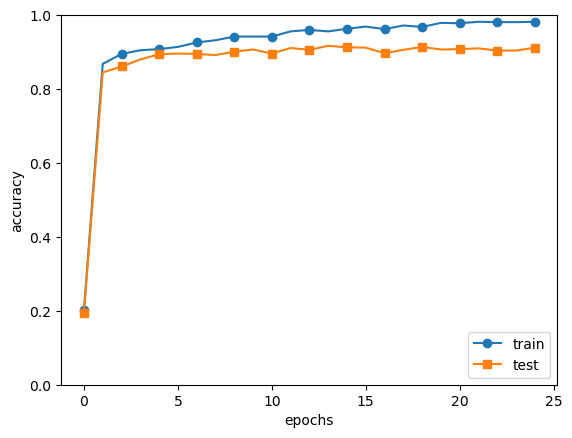

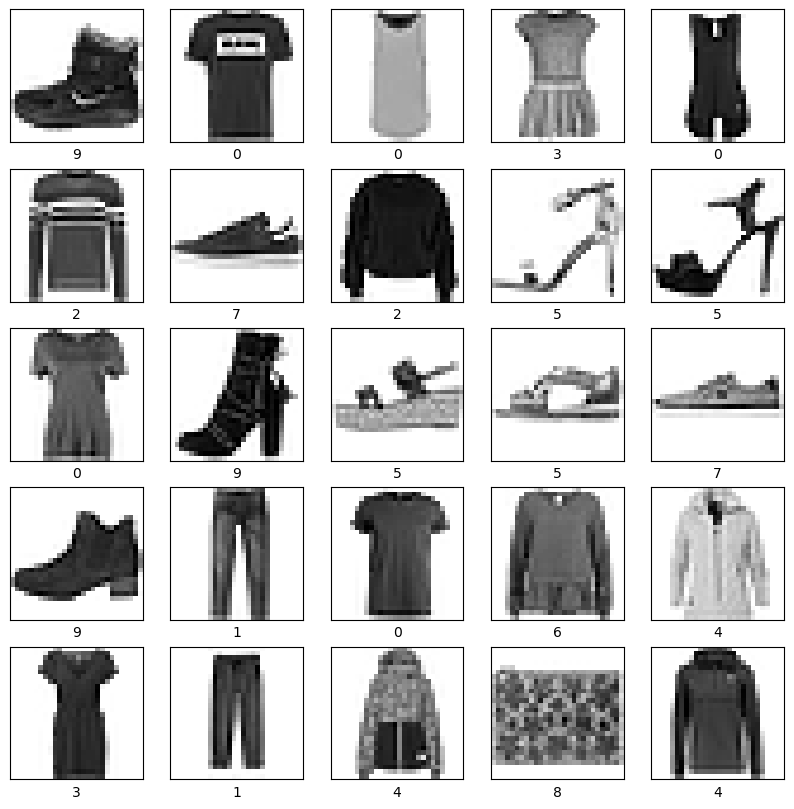

In [6]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer

# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
#x_train, t_train = x_train[:5000], t_train[:5000]
#x_test, t_test = x_test[:1000], t_test[:1000]

max_epochs = 25

network = SimpleConvNet(input_dim=(1,28,28), 
                        conv_param = {'filter_num': 30, 'filter_size': 5, 'pad': 0, 'stride': 1},
                        hidden_size=100, output_size=10, weight_init_std=0.01)
                        
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=max_epochs, mini_batch_size=100,
                  optimizer='Adam', optimizer_param={'lr': 0.001},
                  evaluate_sample_num_per_epoch=1000)
trainer.train()

# 매개변수 보존
network.save_params("params.pkl")
print("Saved Network Parameters!")



# 그래프 그리기
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, trainer.train_acc_list, marker='o', label='train', markevery=2)
plt.plot(x, trainer.test_acc_list, marker='s', label='test', markevery=2)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

def plot_sample_images(x, y, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(class_names[y[i]])
    plt.show()

(x_train, y_train), (x_test, y_test) = load_mnist(normalize=False, flatten=True, one_hot_label=False)

class_names = [str(i) for i in range(10)]

plot_sample_images(x_train, y_train, class_names)